<a href="https://colab.research.google.com/github/shubavarma/DeepLearning/blob/main/random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [479]:
import tensorflow
import tensorflow.keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [480]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DLdatasets/9.random.csv",header=None)

In [481]:
data.head()

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [482]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


No null values

In [483]:
data.shape

(400, 3)

In [484]:
data[2].value_counts()

1.0    202
0.0    198
Name: 2, dtype: int64

Slightly unbalanced data. Binary Classification

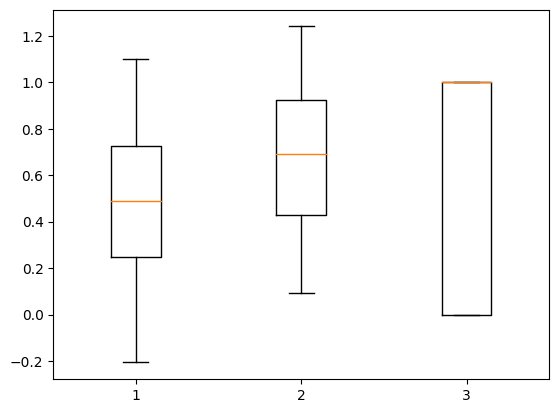

In [485]:
plt.boxplot(data)
plt.show()

No outliers

In [486]:
x = data[[0,1]]
y = data[2]

In [487]:
y = y.astype(int)

In [488]:
# We will split the data first
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=33)

In [489]:
x_train.shape,x_test.shape,len(y_train),len(y_test)

((320, 2), (80, 2), 320, 80)

In [490]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [491]:
data[2].unique()

array([0., 1.])

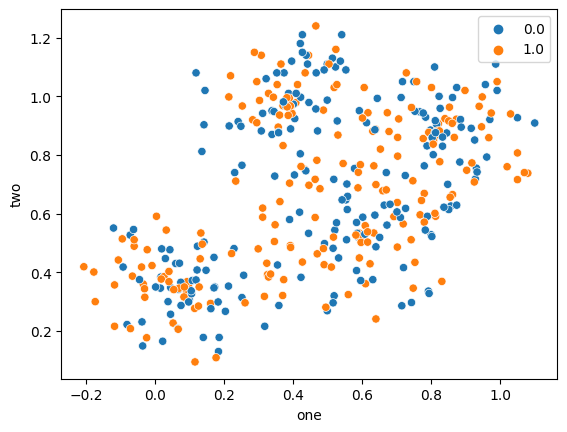

In [492]:
# code to visualize the data
data.columns = ["one","two","three"]
import seaborn as sns
sns.scatterplot(data=data, x="one",y="two",hue="three")
plt.legend()

In [493]:
model = Sequential()
model.add(Dense(7,activation="tanh",input_dim=2))
model.add(Dense(3,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [494]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 7)                 21        
                                                                 
 dense_93 (Dense)            (None, 3)                 24        
                                                                 
 dense_94 (Dense)            (None, 1)                 4         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


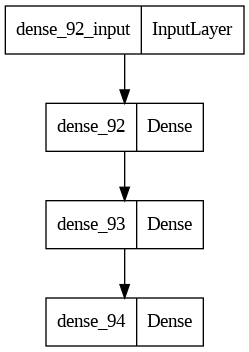

In [495]:
plot_model(model)

In [496]:
model.layers[0].get_weights()

[array([[ 0.18826509, -0.5215577 ,  0.24886858, -0.48359823,  0.5403837 ,
          0.530805  , -0.5865799 ],
        [ 0.05505562,  0.6406244 ,  0.51504624, -0.601371  , -0.04935318,
         -0.15682548, -0.695052  ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [497]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics = ["accuracy"])

In [498]:
history = model.fit(x_train,y_train,batch_size=1, epochs = 100, validation_split=0.2)

Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.7015 - accuracy: 0.5078 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 2/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6975 - accuracy: 0.4844 - val_loss: 0.6985 - val_accuracy: 0.4844
Epoch 3/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6986 - accuracy: 0.5039 - val_loss: 0.6965 - val_accuracy: 0.4688
Epoch 4/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6987 - accuracy: 0.4961 - val_loss: 0.6964 - val_accuracy: 0.4531
Epoch 5/100
256/256 [==============================] - 1s 3ms/step - loss: 0.6950 - accuracy: 0.5156 - val_loss: 0.6994 - val_accuracy: 0.5000
Epoch 6/100
256/256 [==============================] - 1s 3ms/step - loss: 0.6992 - accuracy: 0.4883 - val_loss: 0.6975 - val_accuracy: 0.4844
Epoch 7/100
256/256 [==============================] - 1s 3ms/step - loss: 0.6982 - accuracy: 0.5000 - val_loss: 0.6966 - val_accuracy: 0.4688

In [499]:
model.layers[0].get_weights()

[array([[ 0.17515098, -0.38112292,  0.2801356 , -0.6013099 ,  0.635282  ,
          0.5152613 , -0.6394825 ],
        [ 0.06181372,  0.9302841 ,  0.5603719 , -0.80177486, -0.01527394,
         -0.12421963, -0.4428147 ]], dtype=float32),
 array([-0.02466992, -0.15387146,  0.15880674, -0.29405874,  0.02422452,
         0.28556177,  0.24652757], dtype=float32)]

In [500]:
predict = model.predict(x_test)

3/3 [==============================] - 0s 3ms/step


In [501]:
predict = np.where(predict>0.5,1,0)

In [502]:
accuracy_score(y_test,predict)

0.475

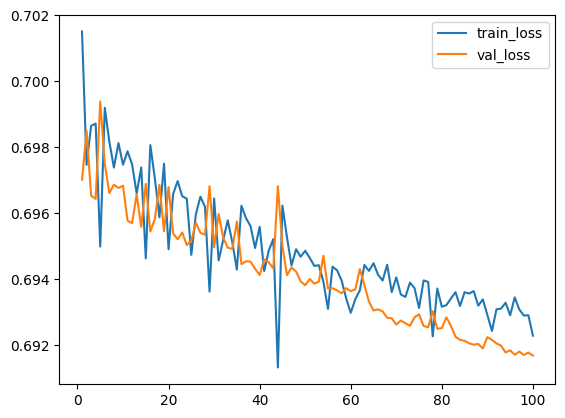

In [503]:
plt.plot(range(1,101),history.history["loss"],label="train_loss")
plt.plot(range(1,101),history.history["val_loss"],label="val_loss")
plt.legend()

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

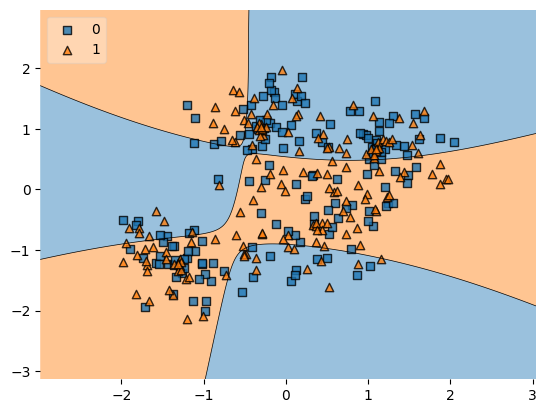

In [504]:
plot_decision_regions(x_train,y_train.values,clf=model,legend=2)

9600/9600 [==============================] - 20s 2ms/step


<Axes: >

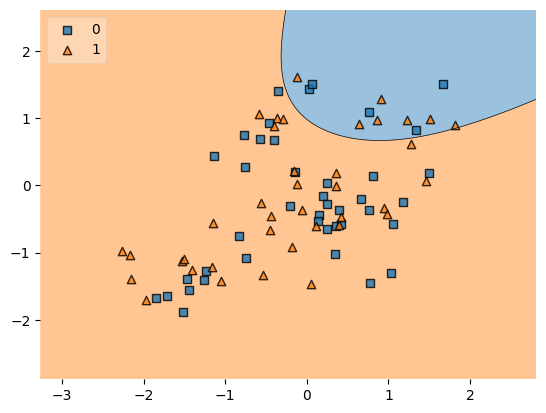

In [478]:
plot_decision_regions(x_test,y_test.values,clf=model,legend=2)